<a href="https://colab.research.google.com/github/SwaroopGaddam/loan-feature-engineering/blob/main/loan_feature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan-Feature Engineering**

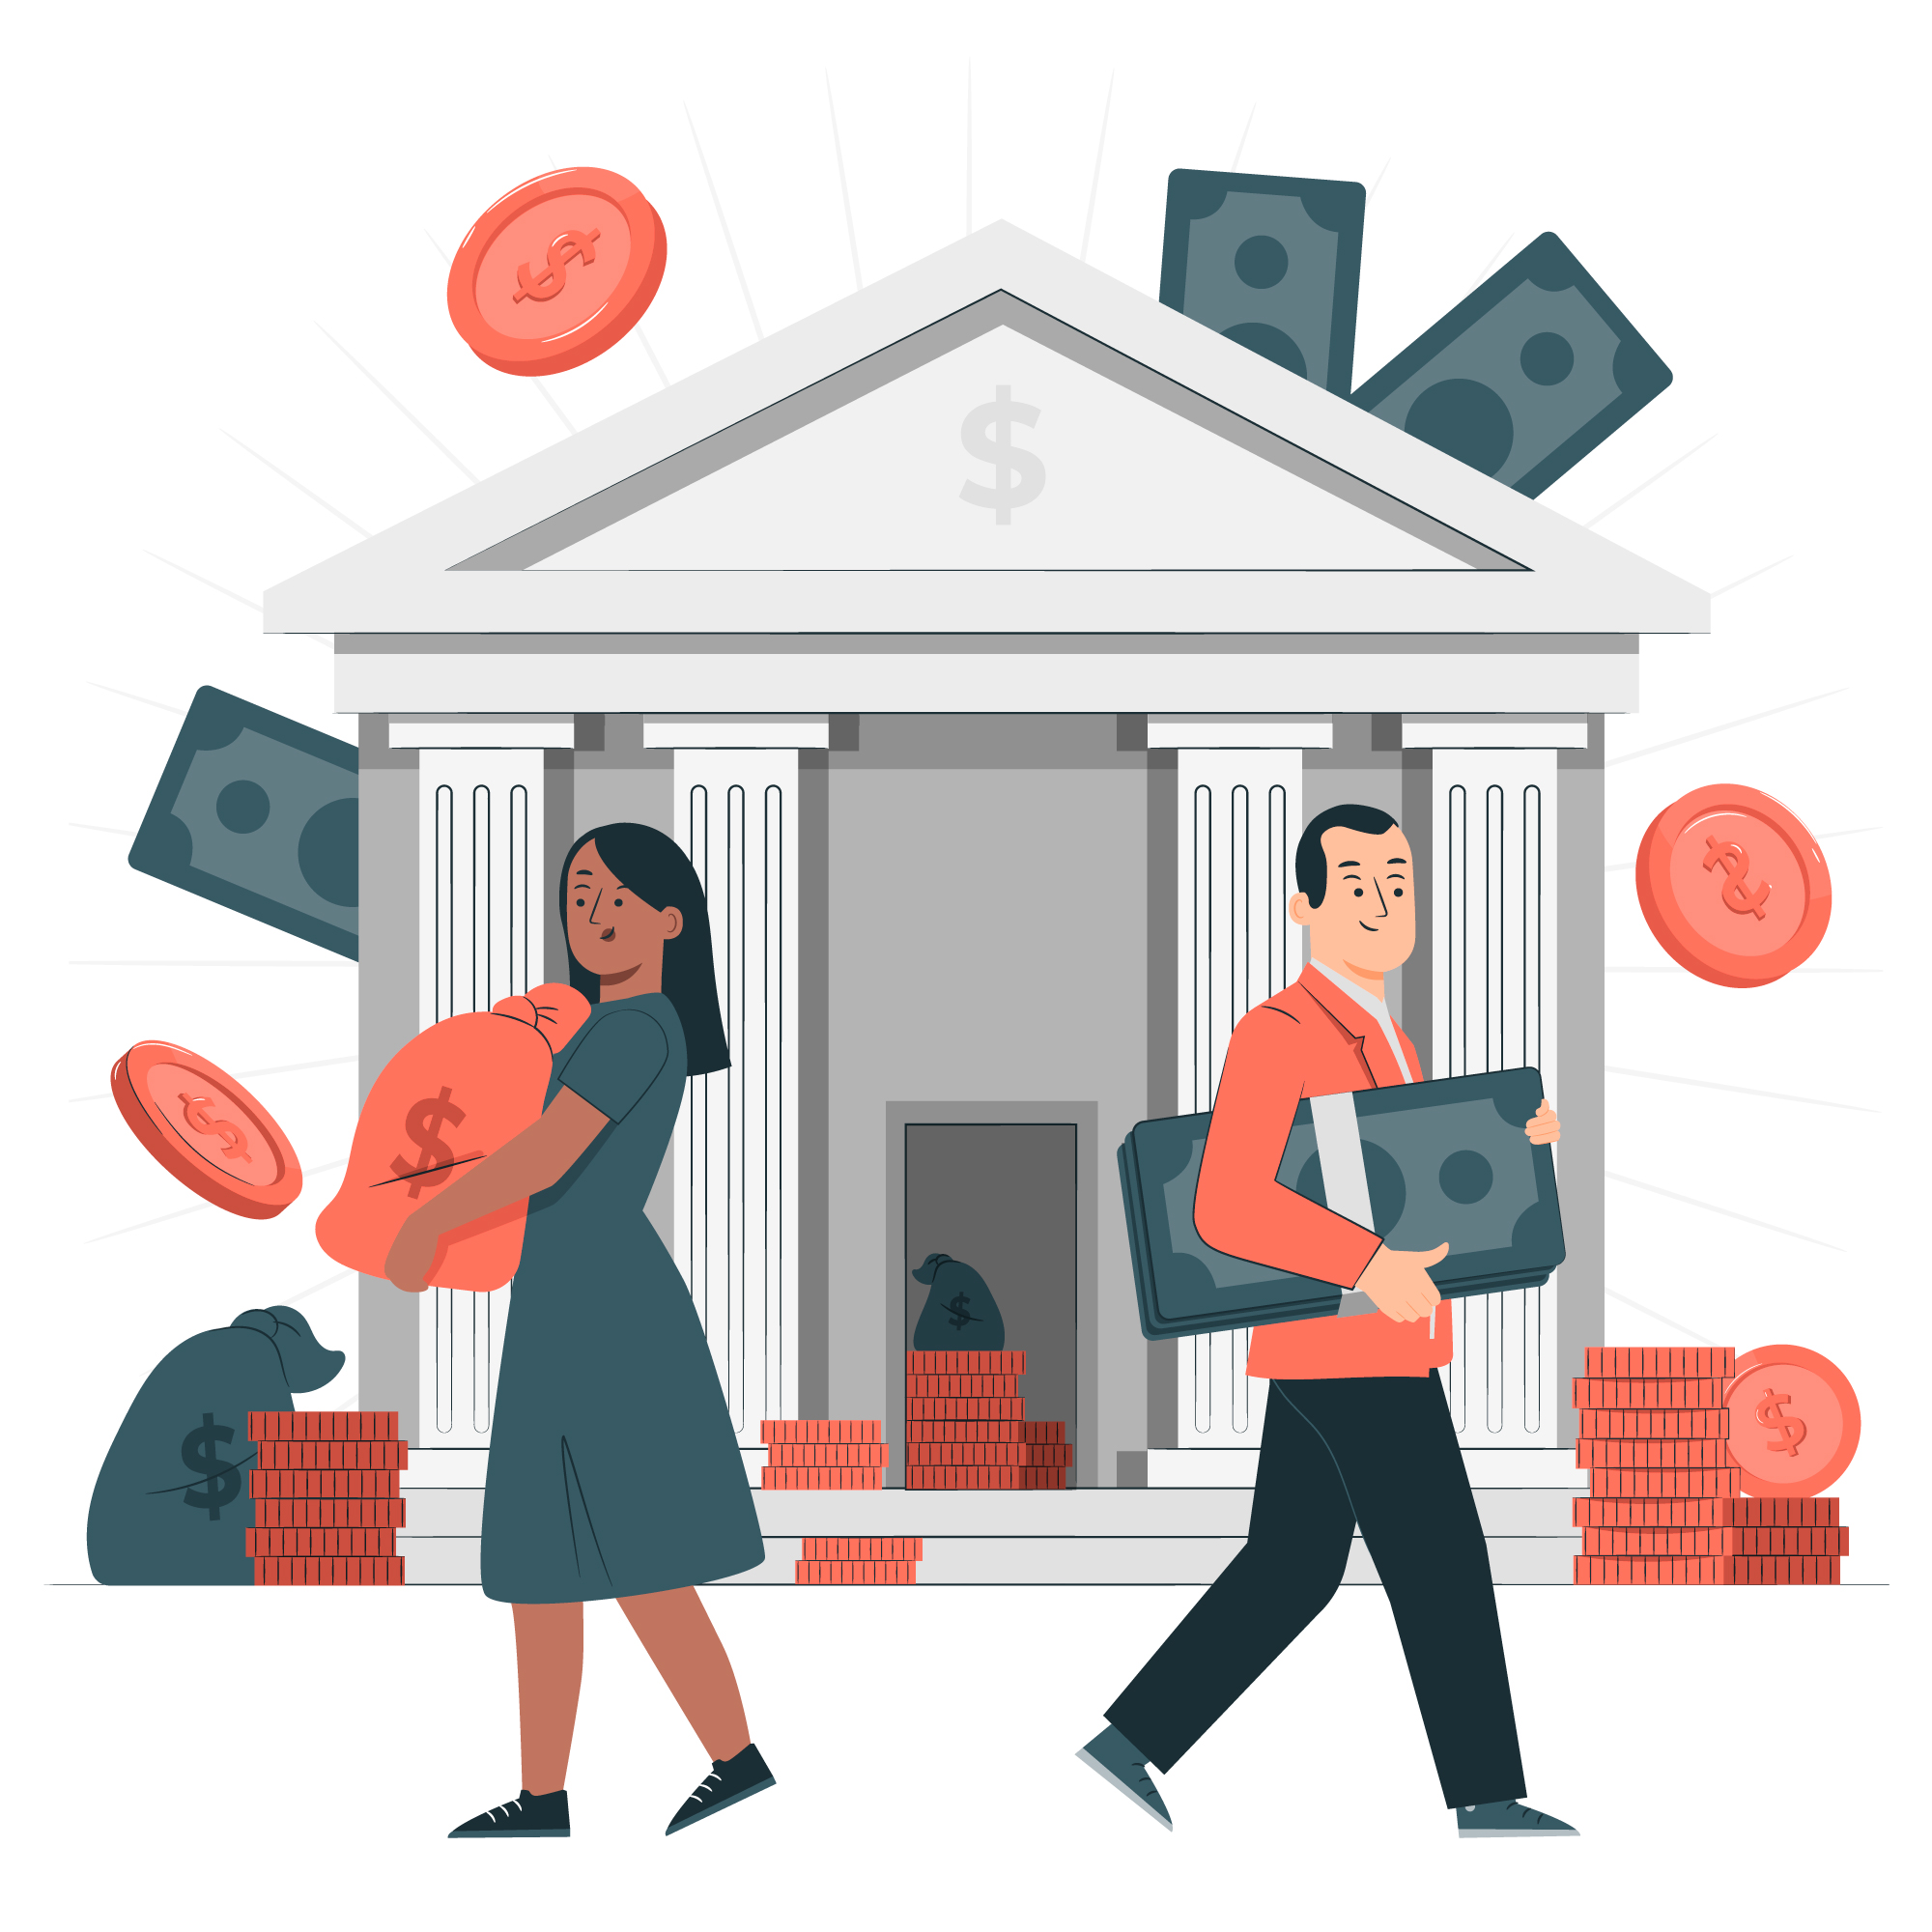

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [65]:
!wget https://raw.githubusercontent.com/SwaroopGaddam/loan-feature-engineering/refs/heads/main/Cleaned_loan_data.csv

--2025-04-01 13:42:37--  https://raw.githubusercontent.com/SwaroopGaddam/loan-feature-engineering/refs/heads/main/Cleaned_loan_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38011 (37K) [text/plain]
Saving to: ‘Cleaned_loan_data.csv.1’

Cleaned_loan_data.c 100%[===================>]  37.12K  --.-KB/s    in 0.007s  

2025-04-01 13:42:37 (5.21 MB/s) - ‘Cleaned_loan_data.csv.1’ saved [38011/38011]



In [66]:
data = pd.read_csv('Cleaned_loan_data.csv')
data.shape

(614, 13)

<font color='purple'> **Dataset Description:**</font>

**Variable Name             Description**

Loan ID           -  Loan reference number

Gender            -  Applicant Gender

Married           -  Applicant Marital status

Dependents        -  Number of Family members

Education         -  applicant education / qualification

Self_Employed     -  Applicant employment status

ApplicantIncome   -  Applicants salary

CoapplicantIncome -  Aditional applicants monthly salary

LoanAmount        -  Loan Amount

Loan_Amount_Term  -  Loan's repayment period

Credit_History    -  Records of Credit history (0-Bad, 1-Good)

Property_Area     -  The location of property

Loan_Status       -  Status of Loan (Y-accepted, N-rejected)

In [67]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here,   

Target: **Loan_Status**  
Remaining columns: **Features**  

Based on features --> Predict target.

In [68]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


- Here in the "**Dependents**" Feild, despite I can see integers as by looking into the entries (0,1,..) but It is showing an **Object** datatype.

In [69]:
data["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


Dependents column is showing Object datatype because of the "**3+**" value  

As **Loan_ID** column has no impact on the status of the loan I am removing that column from the dataset.

In [70]:
data = data.drop('Loan_ID',axis = 1)

In [71]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


As I didn't pass any argument into the describe function the result consists statistics from only numeric features

Based on the summary statistics for the numerical columns in the dataset:

   - The income varies significantly, with the lowest income being `$150`, and the highest being `$81,000`.
   - The majority of applicants have incomes below `$6,000` (75th percentile).
   - Co-applicant incomes range from `$0 to $41,667.`
   - A significant portion of coapplicants has no income (25th percentile).
   - The mean loan amount requested is approximately `$146`, indicating that, on average, applicants seek loans of this amount.
   - The majority of loan terms are for 360 months (30 years).
   - The minimum loan term is 12 months, and the maximum is 480 months.

In [72]:
data.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Based on the above summary statistics:

   - Male applicants significantly outnumber female applicants in the dataset.
   - A significant proportion of applicants are married (398 out of 611).
   - Married applicants are prevalent in the dataset.
   - A substantial portion of applicants has no dependents.
   - Graduates make up a significant portion of the applicant pool.
   - Non-self-employed individuals dominate the dataset.
   - A significant number of applicants are from semiurban areas.
   - The majority of applicants have their loans approved.

Storing the "Categorical" and "Numerical" columns in different variables.

In [73]:
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [74]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

AS 'Loan_Status' is a Target column I will remove it from cat_cols.

In [75]:
# Loan_Status is target, so remove from features
cat_cols.remove('Loan_Status')
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [76]:
target = 'Loan_Status'

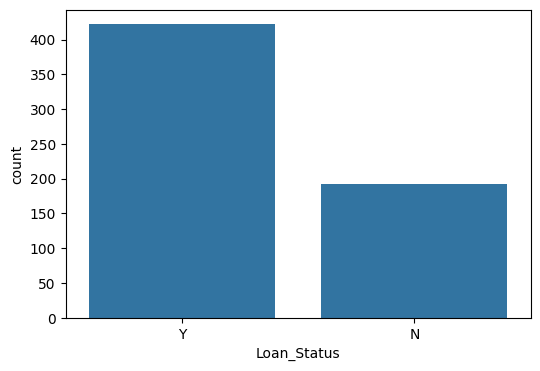

In [77]:
plt.rcParams["figure.figsize"] = [6,4]
sns.countplot(data=data, x='Loan_Status')
plt.show()

This plot indicates that a majority of loan applicants have been approved for loans ("Y") in the dataset, with 422 instances.

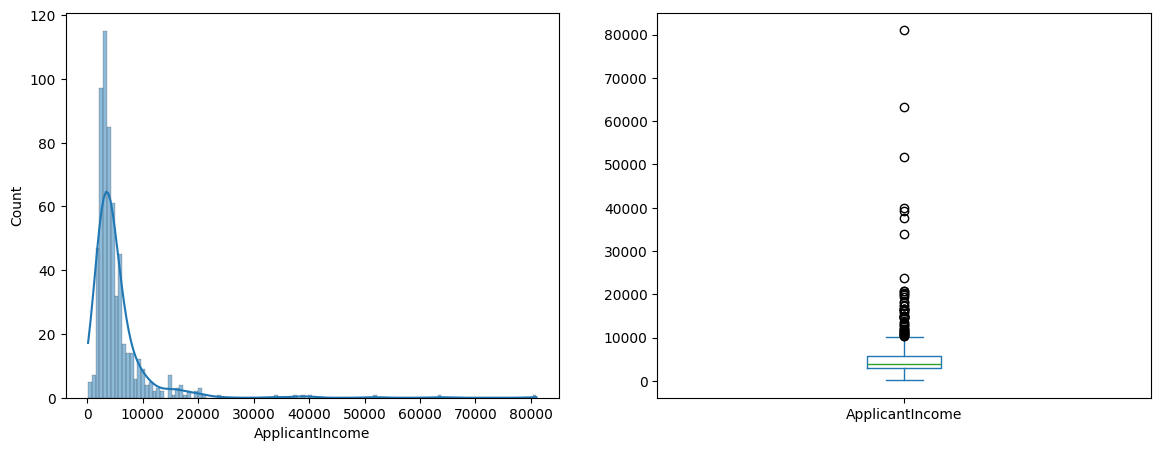

In [78]:
plt.subplot(121)
sns.histplot(data["ApplicantIncome"], kde=True)

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(14,5))
plt.show()

Here I plotted the histplot in one code and a box plot in another code.  

- Histogram is telling us that data is right skewed means there are some people who are earning far more than most of the people.

- It can be inferred that most of the data in the distribution of applicant income is towards the left which means it is not normally distributed.

- The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

Now, let's take "ApplicantIncome" calculate its mean and groupby it with "**Loan_Status**" column.

In [79]:
data.groupby("Loan_Status")['ApplicantIncome'].mean()

,ApplicantIncome
Loan_Status,
N,5446.078125
Y,5384.068720


I can observe that:  
- For those whose Loan gets rejected (N) has higher Income than those whose Loan gets accepted (Y)  
- But something seems wrong here, isn't it?

Let us check if the difference in mean income is significant or not, with the help of `ttest_ind`.

###### <font color='purple'>ttest_ind</font>

In [80]:
from scipy.stats import ttest_ind

a = data[data["Loan_Status"]=="Y"]["ApplicantIncome"]
b = data[data["Loan_Status"]=="N"]["ApplicantIncome"]

# H0: Income and Loan status are independent
# Ha: Dependent
ttest_ind(a, b)

TtestResult(statistic=np.float64(-0.11650844828724542), pvalue=np.float64(0.907287812130518), df=np.float64(612.0))

**p-value is very high --> Loan status and income are independent to each other**

Sometimes it might be more natural to break a numerical column into categorical columns. So let's bin the Applicant colummn to check the significance

## <font color='blue'>**Binning**</font>

In [81]:
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low', 'Average', 'Medium', 'H1', 'H2', 'H3', 'H4', 'Very High']

In [82]:
data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)

In [83]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium


Now let's compare Income_bin and Loan_Status, using `pd.crosstab()`

In [84]:
pd.crosstab(data["Income_bin"],data["Loan_Status"])

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
Medium,45,98
H1,20,34
H2,9,22
H3,13,27
H4,3,6
Very High,1,2


Turning these income groups into a plot will make it even easier to understand.

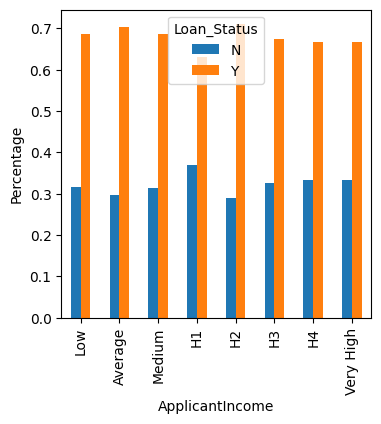

In [85]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"], normalize="index")
Income_bin.plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

**It can be inferred that the Applicant income does not affect the chances of loan approval.**

Let's confirm this using Hypothesis Testing, As I need to test categorical columns I will use Chisquare-test

In [86]:
from scipy.stats import chi2_contingency

val = pd.crosstab(index=data["Income_bin"], columns=data["Loan_Status"]).values

# H0: Loan status and Income are independent
chi2_contingency(val) # chi_stat, p_value, df, expected_values

Chi2ContingencyResult(statistic=np.float64(1.2420001711303135), pvalue=np.float64(0.9899274842922701), dof=7, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 12.50814332,  27.49185668],
       [  2.81433225,   6.18566775],
       [  0.93811075,   2.06188925]]))

Here also p-value is high so I can say that both are **uncorrelated**.

None of these fields seen to be correlated with the target column **Loan_Status**


## <font color='blue'>**Creating new feature**</font>

I can see fields like "Salary, Loan Amount and Loan term" show great impact on the target variable, if I can capture the combined impact there is a higher chance of predicting the target.

In [87]:
data['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [88]:
# Converting Loan_Term to years
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')

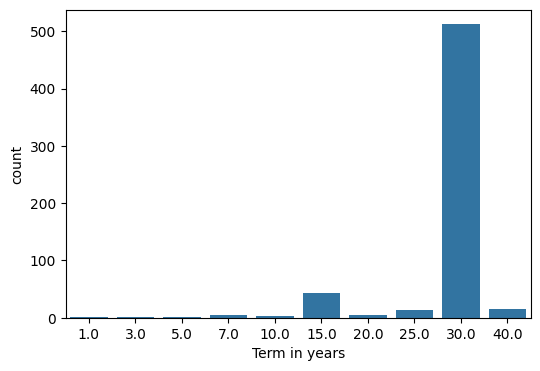

In [89]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

- I can see that more people are taking 30 years of loan term  

Let's plot the **loan amount** too

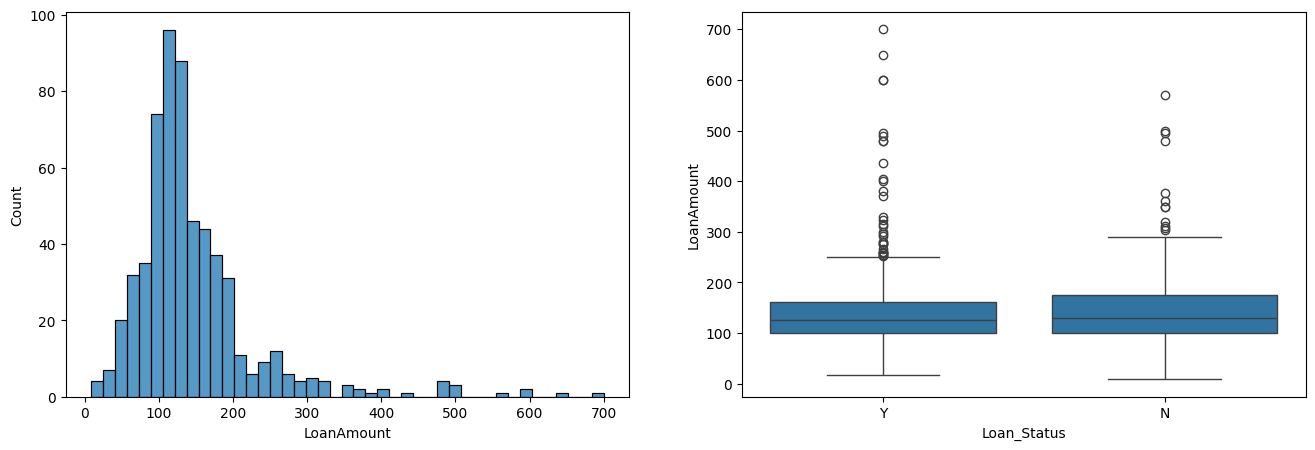

In [90]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

Here it is a **right-skewed** data.

### <font color='blue'>**Able to pay EMI**</font>

What if I could check if a person is able to pay EMI or not.

Because even if applicant's salary is high and his **loan amount** is proportionately very high compared to low income applicant, the loan gets rejected.

In [91]:
data['Loan_Amount_per_year']  = data['LoanAmount']/data['Loan_Amount_Term']
# Crude approximation without interest

In [92]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Loan_Amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,4.700000


The Loan Amount is in thousands of dollars so I have to calculate EMI also in thousands of dollars.

In [93]:
data['EMI'] = data['Loan_Amount_per_year']*1000/12 # Crude approximation without interest
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Loan_Amount_per_year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,4.700000,391.666667


I know the approximated **EMI** for each applicant, now let us compare it with certain proportion of Salary.

In [94]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [95]:
 # considering 30%
 data['Able_to_pay_EMI'] = (data['TotalIncome']* 0.3 > data['EMI']).astype('int')

In [96]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Loan_Amount_per_year,EMI,TotalIncome,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,NaN,NaN,5849.0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,4.266667,355.555556,6091.0,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000,183.333333,3000.0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000,333.333333,4941.0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,4.700000,391.666667,6000.0,1


Now I have 2 categorical columns to compare "**Loan_Status**" and "**Able_to_pay_EMI**"  

<Axes: xlabel='Able_to_pay_EMI', ylabel='count'>

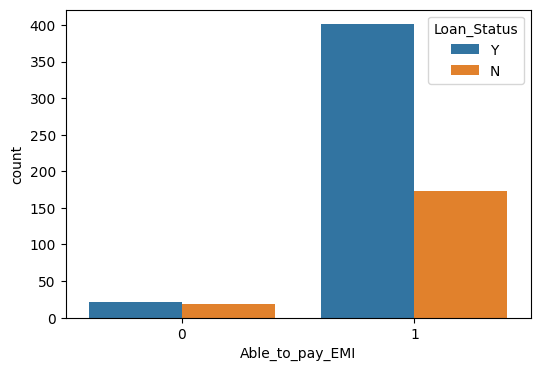

In [97]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')

In [98]:
pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status'], normalize='index')

Loan_Status,N,Y
Able_to_pay_EMI,,
0,0.475000,0.525000
1,0.301394,0.698606


**Observation:**

- There is a 52% chance that you may get the loan approved if you cannot pay the EMI.
- But there, is a 69% chance that you may get the loan approved if you can pay the EMI.

In [99]:
vals = pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status'])
vals

Loan_Status,N,Y
Able_to_pay_EMI,,
0,19,21
1,173,401


In [100]:
chi2_contingency(pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status']))

Chi2ContingencyResult(statistic=np.float64(4.467271867611989), pvalue=np.float64(0.03455011506195388), dof=1, expected_freq=array([[ 12.50814332,  27.49185668],
       [179.49185668, 394.50814332]]))

- The p-value is 0.03 which means a great significance.   

- So **Able_to_pay_EMI** is very related to **Loan_Status**.  


In [101]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Loan_Amount_per_year,EMI,TotalIncome,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,NaN,NaN,5849.0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,4.266667,355.555556,6091.0,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000,183.333333,3000.0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000,333.333333,4941.0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,4.700000,391.666667,6000.0,1


- By creating a new feature with the help of existing fields (which are uncorrelated with the target variable), now I can be more confident on my prediction of target column

In [102]:
# saving the dataframe to CSV file
data.to_csv('updated_loan.csv',index=False)